In [1]:
import torch.optim as optim
from utils import torch, cuda, plot_dataset_sample, test, train, plot_model_performance, test_acc
from dataset import get_loader, dataset_mean, dataset_std
from model import nn, S9Model
from torchsummary import summary

CUDA Available? False


ImportError: cannot import name 'plot_incorrect_pred' from 'utils' (/Users/piyushgrover/Workspace/erav1/s9erav1/utils.py)

In [2]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_loader, test_loader = get_loader(**kwargs)


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


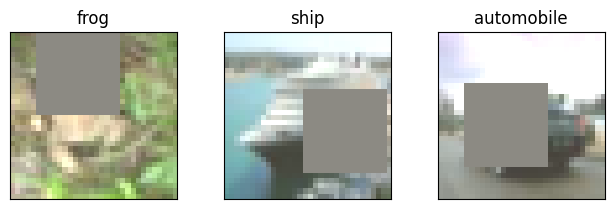

In [5]:
plot_dataset_sample(train_loader, dataset_mean, dataset_std)

In [6]:
device = torch.device("cuda" if cuda else "cpu")
model = S9Model(16, norm='bn').to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
       BatchNorm2d-2           [-1, 16, 32, 32]              32
         Dropout2d-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]           2,320
       BatchNorm2d-5           [-1, 16, 32, 32]              32
         Dropout2d-6           [-1, 16, 32, 32]               0
            Conv2d-7           [-1, 16, 32, 32]           2,320
       BatchNorm2d-8           [-1, 16, 32, 32]              32
         Dropout2d-9           [-1, 16, 32, 32]               0
           Conv2d-10           [-1, 16, 32, 32]             160
           Conv2d-11           [-1, 32, 32, 32]             544
      BatchNorm2d-12           [-1, 32, 32, 32]              64
        Dropout2d-13           [-1, 32, 32, 32]               0
           Conv2d-14           [-1, 32,

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1, verbose=True)
# New Line
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=1, threshold=0.001, threshold_mode='abs', eps=0.001, verbose=True)
criterion = nn.CrossEntropyLoss()
num_epochs = 100

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)
  scheduler.step(test_acc[-1]*0.01)
  
#plot_incorrect_preds(dataset_mean, dataset_std, 15)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=1.6695 Batch_id=781 Accuracy=33.17: 100%|██████████| 782/782 [05:15<00:00,  2.48it/s]


Test set: Average loss: 1.4663, Accuracy: 4604/10000 (46.04%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=1.2274 Batch_id=781 Accuracy=45.22: 100%|██████████| 782/782 [07:08<00:00,  1.83it/s]


Test set: Average loss: 1.2511, Accuracy: 5464/10000 (54.64%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=1.2745 Batch_id=781 Accuracy=50.91: 100%|██████████| 782/782 [30:13<00:00,  2.32s/it]  


Test set: Average loss: 1.0173, Accuracy: 6357/10000 (63.57%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=1.9031 Batch_id=781 Accuracy=54.39: 100%|██████████| 782/782 [05:56<00:00,  2.19it/s]


Test set: Average loss: 1.0302, Accuracy: 6318/10000 (63.18%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=1.3898 Batch_id=781 Accuracy=57.39: 100%|██████████| 782/782 [06:35<00:00,  1.98it/s]


Test set: Average loss: 0.9318, Accuracy: 6757/10000 (67.57%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=1.3250 Batch_id=781 Accuracy=59.65: 100%|██████████| 782/782 [06:07<00:00,  2.13it/s]


Test set: Average loss: 0.8957, Accuracy: 6870/10000 (68.70%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=1.6495 Batch_id=781 Accuracy=61.30: 100%|██████████| 782/782 [05:57<00:00,  2.19it/s]


Test set: Average loss: 0.8549, Accuracy: 6985/10000 (69.85%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 8


Train: Loss=1.2462 Batch_id=165 Accuracy=63.73:  21%|██        | 166/782 [01:24<04:21,  2.36it/s]

In [ ]:
plot_model_performance()